In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.1/302.1 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00


In [11]:
df = pd.read_csv('/content/drive/My Drive/internship/dfr.csv')
# Convert timestamps to datetime format
df['utc_timestamp'] = pd.to_datetime(df['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)

In [12]:
df.head()

,cet_cest_timestamp,year,weekofyear,dayofweek,month,hour,daily_DE_KN_industrial3_refrigerator,daily_DE_KN_residential3_refrigerator,daily_DE_KN_residential4_refrigerator,daily_DE_KN_residential5_refrigerator
utc_timestamp,,,,,,,,,,
2015-10-26 11:00:00,2015-10-26T12:00:00+0100,2015,44,1,10,11,0.041,0.020,0.031,0.000
2015-10-26 12:00:00,2015-10-26T13:00:00+0100,2015,44,1,10,12,0.041,0.023,0.000,0.071
2015-10-26 13:00:00,2015-10-26T14:00:00+0100,2015,44,1,10,13,0.037,0.023,0.036,0.011
2015-10-26 14:00:00,2015-10-26T15:00:00+0100,2015,44,1,10,14,0.040,0.019,0.000,0.044
2015-10-26 15:00:00,2015-10-26T16:00:00+0100,2015,44,1,10,15,0.040,0.007,0.032,0.058


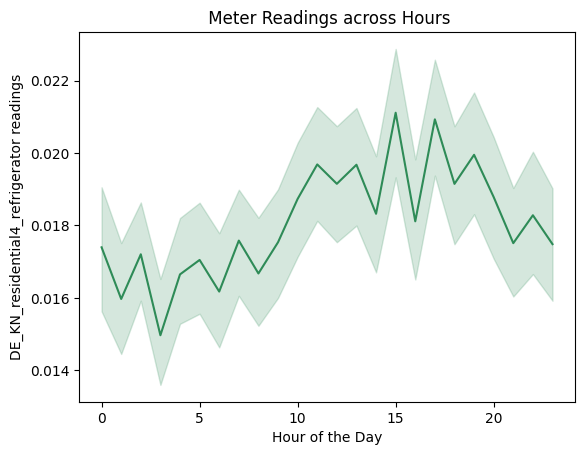

In [13]:
import seaborn as sns


sns.lineplot(x=df['hour'], y=df['daily_DE_KN_residential4_refrigerator'], color='seagreen')

# Set labels and title
plt.ylabel("DE_KN_residential4_refrigerator readings")
plt.xlabel("Hour of the Day")
plt.title(" Meter Readings across Hours")

# Show the plot
plt.show()

In [14]:
df = df.drop(axis=1, columns=['cet_cest_timestamp','year',	'weekofyear',	'dayofweek', 	'month', 	'hour'])

In [15]:
df1 = df.drop(axis=1, columns=['daily_DE_KN_residential3_refrigerator'	,'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator'])

In [16]:
df1.head()

,daily_DE_KN_industrial3_refrigerator
utc_timestamp,
2015-10-26 11:00:00,0.041
2015-10-26 12:00:00,0.041
2015-10-26 13:00:00,0.037
2015-10-26 14:00:00,0.040
2015-10-26 15:00:00,0.040


In [18]:
df1.head()

,daily_DE_KN_industrial3_refrigerator
utc_timestamp,
2015-10-26 11:00:00,0.041
2015-10-26 12:00:00,0.041
2015-10-26 13:00:00,0.037
2015-10-26 14:00:00,0.040
2015-10-26 15:00:00,0.040


In [23]:
# Function to get the timestamps for the previous and next two days at the same time
def get_surrounding_timestamps(base_timestamp):
    base_date = datetime.strptime(base_timestamp, "%Y-%m-%d %H:%M:%S")
    surrounding_dates = [base_date + timedelta(days=offset) for offset in [-2, -1, 1, 2]]
    return [date.strftime("%Y-%m-%d %H:%M:%S") for date in surrounding_dates]

# Get the surrounding timestamps
timestamps_14 = get_surrounding_timestamps("2015-10-28 11:00:00")
timestamps_15 = get_surrounding_timestamps("2015-10-28 12:00:00")

# Calculate the averages
average_14 = df1.loc[timestamps_14, 'daily_DE_KN_industrial3_refrigerator'].mean()
average_15 = df1.loc[timestamps_15, 'daily_DE_KN_industrial3_refrigerator'].mean()

# Replace the values in the dataset
df1.at['2015-10-28 11:00:00', 'daily_DE_KN_industrial3_refrigerator'] = average_14
df1.at['2015-10-28 12:00:00', 'daily_DE_KN_industrial3_refrigerator'] = average_15

In [28]:
last_timestamp = df.index.max()
two_months_ago = last_timestamp - timedelta(days=60)

# Filter the data for the last two months
last_two_months = df[two_months_ago:]

In [25]:
import wandb
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error


In [33]:
wandb.init(project='SMA3', entity='tuncayezgi')

# Define a range of window sizes to test
window_sizes = range(1,2388)
min_mse = float('inf')
optimal_window_size = None

for window_size in window_sizes:
    # Calculate the moving average using the specified window size
    ma_prediction = df1.loc[:two_months_ago, 'daily_DE_KN_industrial3_refrigerator'].rolling(window=window_size, min_periods=1).mean().iloc[-1]

    # Use this prediction for the last two months
    predicted_values = np.full_like(last_two_months['daily_DE_KN_industrial3_refrigerator'], ma_prediction)

    # Calculate metrics for the last two months
    mae = mean_absolute_error(last_two_months['daily_DE_KN_industrial3_refrigerator'], predicted_values)
    mse = mean_squared_error(last_two_months['daily_DE_KN_industrial3_refrigerator'], predicted_values)
    mape = np.mean(np.abs((last_two_months['daily_DE_KN_industrial3_refrigerator'] - predicted_values) / last_two_months['daily_DE_KN_industrial3_refrigerator'])) * 100
    r2 = r2_score(last_two_months['daily_DE_KN_industrial3_refrigerator'], predicted_values)

    if mse < min_mse:
        min_mse = mse
        optimal_window_size = window_size
    # Log metrics to WandB for each window size
    wandb.log({'window_size': window_size, 'MAE': mae, 'MSE': mse, 'MAPE': mape, 'R2': r2})


wandb.log({'optimal_window_size': optimal_window_size, 'minimum_mse': min_mse})
# Close the WandB run
wandb.finish()

wandb: Currently logged in as: tuncayezgi. Use `wandb login --relogin` to force relogin


MAE,▇▇▇█▇▇▇▆▆▇▇▇███▇▇███▇▇▇▇▆▅▄▃▂▂▂▁▁▁▁▁▁▁▁▁
MSE,▇▇▇█▇▇▇▆▆▇▇▇▇██▇▇██▇▇▇▇▇▆▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁
R2,▂▂▂▁▂▂▂▃▃▂▂▂▂▁▁▂▂▁▁▂▂▂▂▂▃▅▆▆▇▇██████████
minimum_mse,▁
optimal_window_size,▁
window_size,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
MAE,0.02266
MAPE,inf
MSE,0.0006
R2,-0.04841
minimum_mse,0.0006


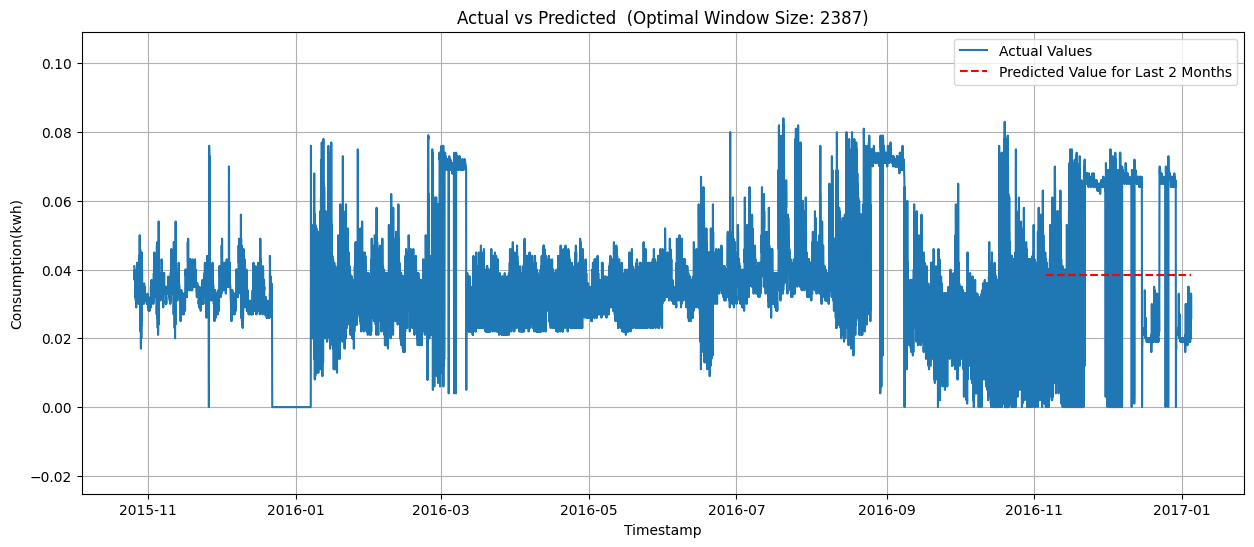

In [34]:
# Assuming 'data6' is the DataFrame we are working with
# Calculate the moving average using the optimal window size
optimal_ma_prediction = df1.loc[:two_months_ago, 'daily_DE_KN_industrial3_refrigerator'].rolling(window=optimal_window_size, min_periods=1).mean().iloc[-1]

# Determine the range for 'log_meter_reading' in data6
reading_min = df1['daily_DE_KN_industrial3_refrigerator'].min()
reading_max = df1['daily_DE_KN_industrial3_refrigerator'].max()
padding = (reading_max - reading_min) * 0.3  # 10% padding on each side

# Plotting
plt.figure(figsize=(15, 6))

# Plot the actual values for the entire period from data6
plt.plot(df1.index, df1['daily_DE_KN_industrial3_refrigerator'], label='Actual Values')

# Plot the predicted value line only for the last two months
plt.hlines(y=optimal_ma_prediction, xmin=last_two_months.index[0], xmax=last_two_months.index[-1], colors='r', linestyles='--', label='Predicted Value for Last 2 Months')

plt.title(f'Actual vs Predicted  (Optimal Window Size: {optimal_window_size})')
plt.xlabel('Timestamp')
plt.ylabel('Consumption(kwh)')

# Set the y-axis limits
plt.ylim(reading_min - padding, reading_max + padding)

plt.legend()
plt.grid(True)
plt.show()

In [35]:
df2 = df.drop(axis=1, columns=['daily_DE_KN_industrial3_refrigerator'	,'daily_DE_KN_residential4_refrigerator','daily_DE_KN_residential5_refrigerator'])

In [36]:
# Get the surrounding timestamps
timestamps_16 = get_surrounding_timestamps("2015-10-28 11:00:00")
timestamps_17 = get_surrounding_timestamps("2015-10-28 12:00:00")

# Calculate the averages
average_16 = df2.loc[timestamps_16, 'daily_DE_KN_residential3_refrigerator'].mean()
average_17 = df2.loc[timestamps_17, 'daily_DE_KN_residential3_refrigerator'].mean()

# Replace the values in the dataset
df2.at['2015-10-28 11:00:00', 'daily_DE_KN_residential3_refrigerator'] = average_16
df2.at['2015-10-28 12:00:00', 'daily_DE_KN_residential3_refrigerator'] = average_17

In [37]:
wandb.init(project='SMA3_p2', entity='tuncayezgi')

# Define a range of window sizes to test
window_sizes = range(1,2388)
min_mse = float('inf')
optimal_window_size = None

for window_size in window_sizes:
    # Calculate the moving average using the specified window size
    ma_prediction = df2.loc[:two_months_ago, 'daily_DE_KN_residential3_refrigerator'].rolling(window=window_size, min_periods=1).mean().iloc[-1]

    # Use this prediction for the last two months
    predicted_values = np.full_like(last_two_months['daily_DE_KN_residential3_refrigerator'], ma_prediction)

    # Calculate metrics for the last two months
    mae = mean_absolute_error(last_two_months['daily_DE_KN_residential3_refrigerator'], predicted_values)
    mse = mean_squared_error(last_two_months['daily_DE_KN_residential3_refrigerator'], predicted_values)
    mape = np.mean(np.abs((last_two_months['daily_DE_KN_residential3_refrigerator'] - predicted_values) / last_two_months['daily_DE_KN_residential3_refrigerator'])) * 100
    r2 = r2_score(last_two_months['daily_DE_KN_residential3_refrigerator'], predicted_values)

    if mse < min_mse:
        min_mse = mse
        optimal_window_size = window_size
    # Log metrics to WandB for each window size
    wandb.log({'window_size': window_size, 'MAE': mae, 'MSE': mse, 'MAPE': mape, 'R2': r2})


wandb.log({'optimal_window_size': optimal_window_size, 'minimum_mse': min_mse})
# Close the WandB run
wandb.finish()

MAE,▁▁▁▁▁▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▃▃▃▄▄▄▅▆▅▅▅▅▆▇█
MSE,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▅▅▅▆▆▆▆▆▆▇▇█
R2,███████████████▇▇▇▇▇▇▆▆▆▆▆▅▅▄▄▄▃▃▃▃▃▃▂▂▁
minimum_mse,▁
optimal_window_size,▁
window_size,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
MAE,0.0094
MAPE,inf
MSE,0.00013
R2,-0.08701
minimum_mse,0.00012


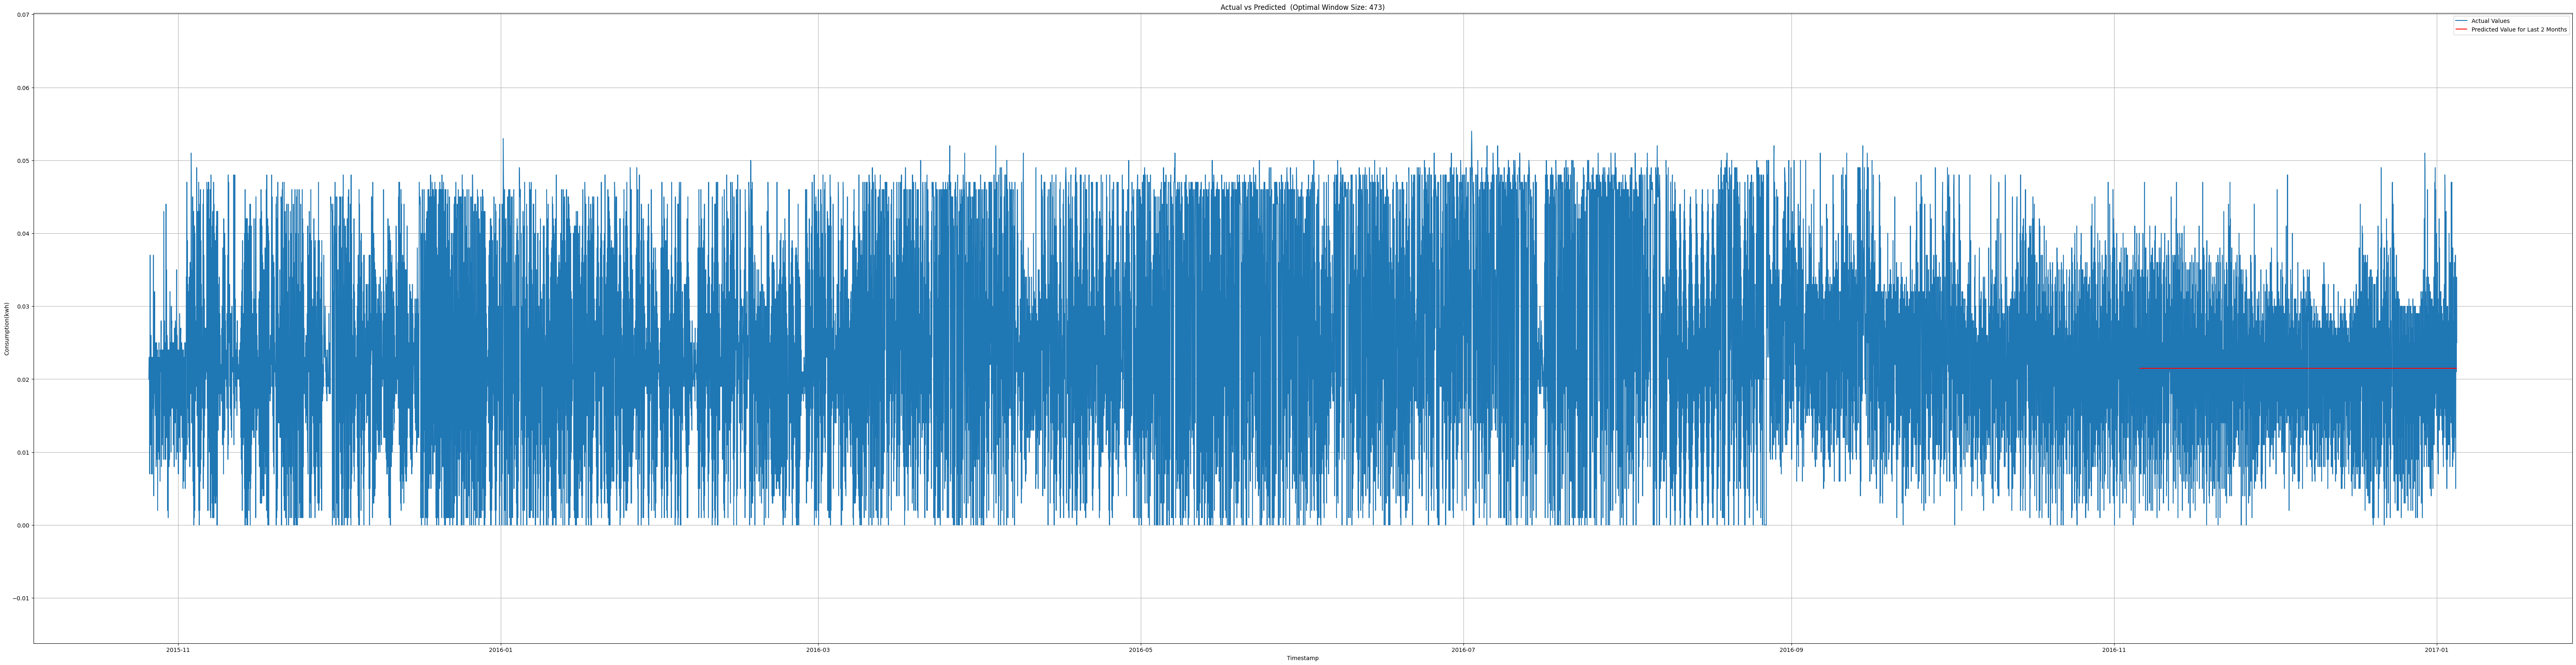

In [42]:
# Assuming 'data6' is the DataFrame we are working with
# Calculate the moving average using the optimal window size
optimal_ma_prediction = df2.loc[:two_months_ago, 'daily_DE_KN_residential3_refrigerator'].rolling(window=optimal_window_size, min_periods=1).mean().iloc[-1]

# Determine the range for 'log_meter_reading' in data6
reading_min = df2['daily_DE_KN_residential3_refrigerator'].min()
reading_max = df2['daily_DE_KN_residential3_refrigerator'].max()
padding = (reading_max - reading_min) * 0.3  # 10% padding on each side

# Plotting
plt.figure(figsize=(80, 20))

# Plot the actual values for the entire period from data6
plt.plot(df2.index, df2['daily_DE_KN_residential3_refrigerator'], label='Actual Values')

# Plot the predicted value line only for the last two months
plt.hlines(y=optimal_ma_prediction, xmin=last_two_months.index[0], xmax=last_two_months.index[-1], colors='r', linestyles='solid', label='Predicted Value for Last 2 Months')

plt.title(f'Actual vs Predicted  (Optimal Window Size: {optimal_window_size})')
plt.xlabel('Timestamp')
plt.ylabel('Consumption(kwh)')

# Set the y-axis limits
plt.ylim(reading_min - padding, reading_max + padding)

plt.legend()
plt.grid(True)
plt.show()